# Introduction to probability

**Inferential statistics** - tools to answer questions about an entire population based on a sample<br> 


## How are probability and statistics different?

**Probability theory**: "the doctrine of chances"<br> 
probability questions start with a known model of the world, then use the model to do calculations.<br> 
model is known, the data are not<br> 

**Statistics**: we have the data, but not the model<br> 


## What does probability mean? 

**The frequentist view**<br>
defines probability as a long-run frequency.<br> 
Flip a fair coin over and over again, and as the number of flips goes to infinity, the proportion of heads convertges to 0.5. 
benefits<br> 
- probability statements only make sense if they refer to some events occuring in the physical universe
- unambiguous
drawbacks<br> 
- infinite sequences don't exist
- generaly forbids us from making probability statements about one-time events (e.g. chance of rain on a given day)


**The bayesian view**<br> 
subjective probability - the probability of an event is the **Degree of belief** that an intelligent and rational agent assigns to the truth of that event.<br> 
probabilites don't exist- but in the thoughts and assumptions of people<br> 
benefits<br> 
- can assign probabilities to any event
distadvantages<br> 
- can't be purely objective

## Basic probability theory

**Introducing probability distributions**<br> 
5 pairs of pants: X1, X2, X3, X4, X5<br> 
each pair of pants is an **elementary event** - every time we make an observation, the outcome is one and only one of those events.<br> 
**Sample space** - set of all possible events<br> 
**Law of total probability** - sum of probabilities add up to 1<br> 
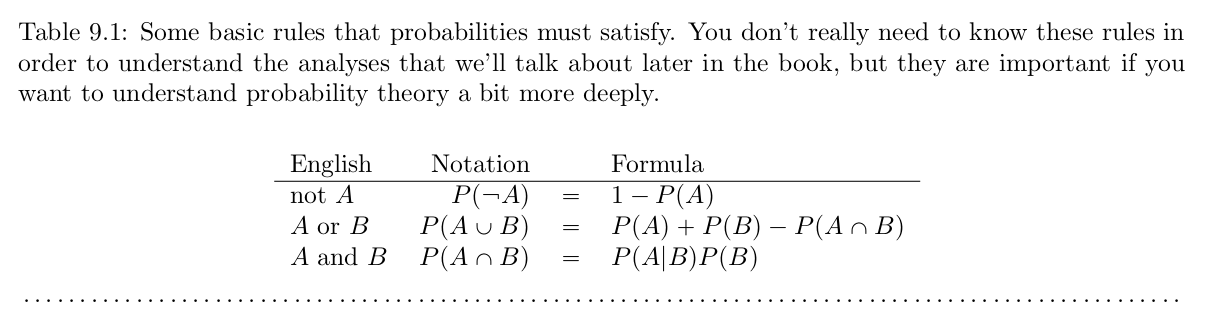

## The binomial distribution

**Size parameter** - number of trials - $N$<br> 
**Success probability** - probability that something (usually called a success) happened - $\theta$<br> 
X = results of 1 experiment (**called a random variable**)<br> 

ex: roll 20 dice with a skull on one side and all the other faces blank. What is the probability that we will get exactly 4 skulls?<br> 

calulate the probability that $X = 4$ given $\theta = 0.167$ and $N=20$. general form: <br> 
$P(X | \theta, N)$

To say that X is generated randomly from a binomail distribution:<br> 
$ X \sim \text{Binomial}(\theta, N)$

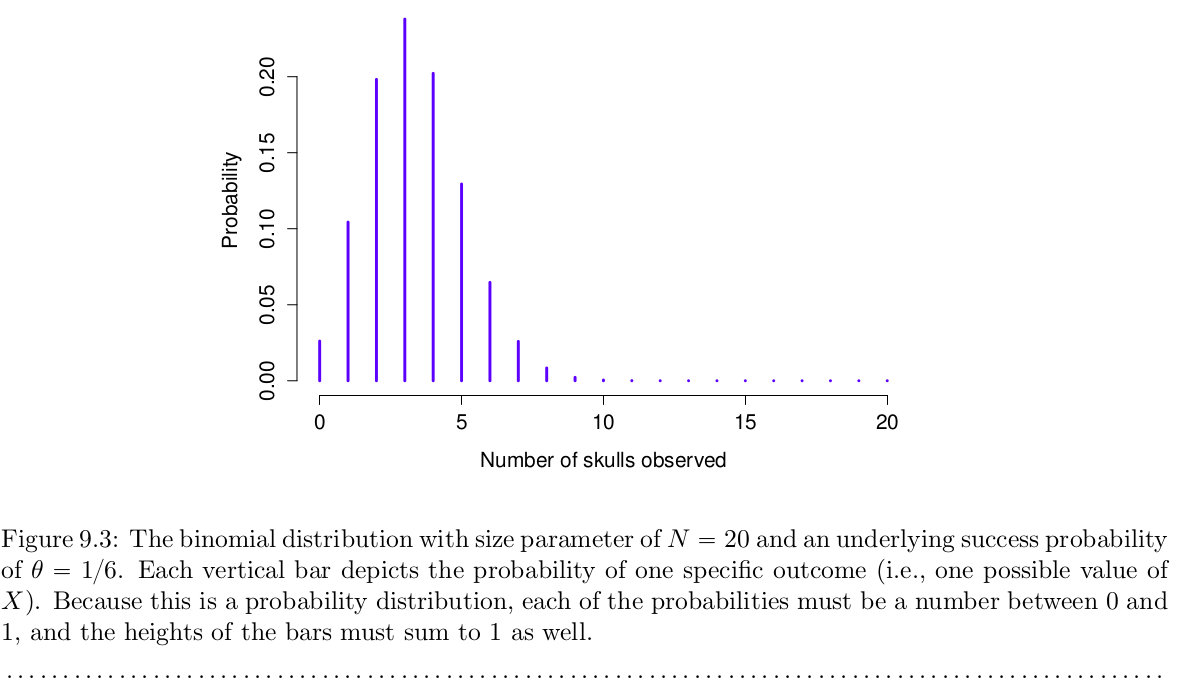


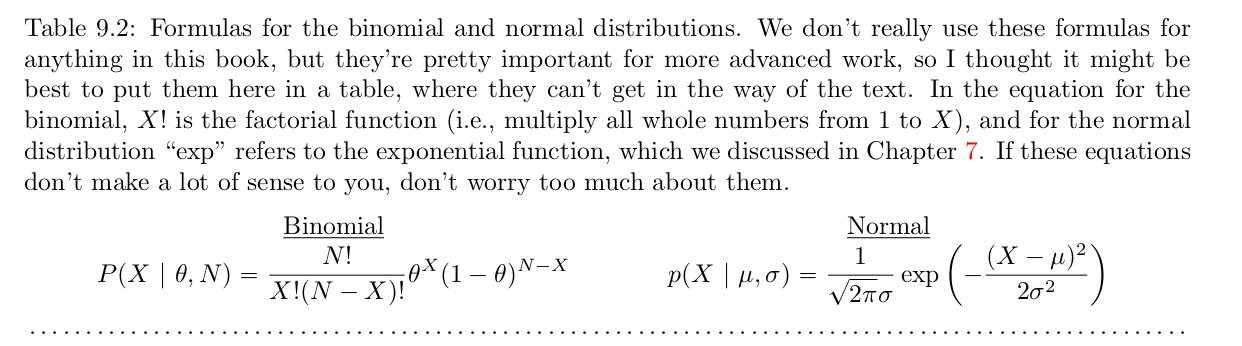


**Working with the binomial distribution in R**<br>

use `dbinom()`<br> 
params:<br> 
- x = number (or vector of numbers) specifying the outcomes whose probabilities we're trying to calculate
- size = number of trails
- prob = success probability for one trial

In [1]:
dbinom(x=4, size=20, prob=1/6)

[1] 0.2022036

R provides 4 functions related to each distribution- each starting with **d**, **p**, **q**, and **r**

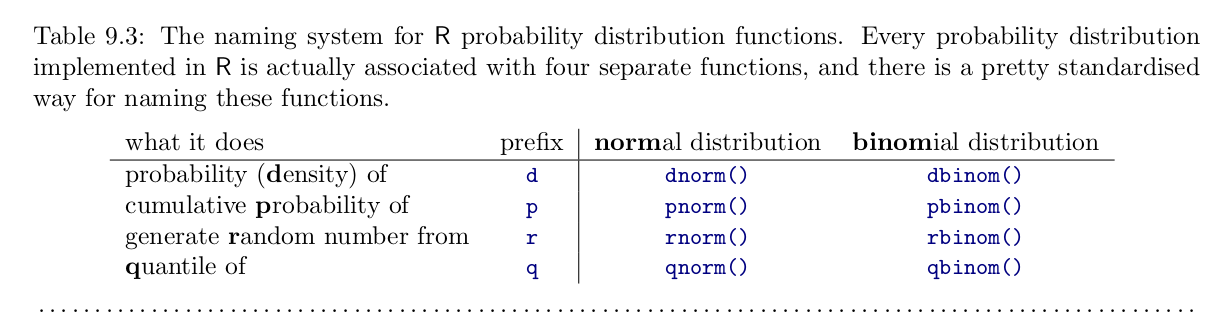

- **d**: probability of obtaining the selected outcome (probability density)
- **p**: cumulative probability. specify a **quantile** and it returns the probability of an outcome smaller than or equal to q
- **q**: calculates **quantiles** of the distribution. specify a probability value, it returns the corresponding percentile.
- **r**: generate n random outcomes from the distirbution

example with `pbinom()`. Probability of rolling 4 or fewer skulls (i.e. $P(0) + P(1) + P(2) + P(3) + P(4)$<br>

In [2]:
pbinom(q=4, size=20, prob=1/6)

[1] 0.7687492

There is a 76.9% chance of rolling 4 or fewer skulls<br> 

Now, use `qbinom()` to calculate the 75th percentile<br> 

In [3]:
qbinom(p=0.75, size=20, prob=1/6)

[1] 4

there really isn't a 75th percentile, becuase it lies between 3 and 4. If you ask for a percentile that doesn't exist, then R will find the smalles value for whieh the percentile rank is at least what you asked for. <br> 

This is only the case for discrete distirbutions. For continuous distributions, R will return an exact percentile<br> 

Generate 100 random samples

In [4]:
rbinom(n=100, size=20, prob=1/6)

[1] 4 4 5 1 1 2 3 4 2 3 3 4 3 2 5 0 3 2 7 3 3 3 5 3 7 7 3 1 4 3 1 3 3 2 4 5 3
 [38] 3 4 4 1 2 2 3 5 5 3 1 4 1 1 6 4 6 6 1 4 3 1 4 2 5 2 3 3 4 5 6 6 4 2 0 3 5
 [75] 3 4 2 2 4 3 4 3 3 5 1 3 5 4 4 2 6 4 1 3 4 6 4 4 4 1

## The normal distribution

bell curve, gaussian distribution<br> 

args: `mean`, `std`<br> 

68.3% of the data alwyas falls within 1 sd of the mean, 95.4% within 2 sd's and 99.7% within 3 sd's<br> 

**Probability density**<br> 

When dealing with continuous variables, the probability of obtaining one specific value is effectively 0. Instead, we're interested in the probability of obtaining a value within a range. **probability density** (denoted $p(x)$) corresponds to the height of the distribution curve. The actual probabilities are calculated as the area under the curve.<br> 

## Other useful distributions

- t distribution: normal distribution but with heavier tails. 
    - used when you think the data actually follows a normal distribution, but you don't know the mean or std
    - use `dt()`, `pt()`, `qt()`, `rt()`
- $\chi^2$ distribution
    - categorical data anlysis
    - if you have a bunch of normall distributed variables and take the sum of squares, that sum has a $\chi^2$ distribution
    - `dchisq()`, `pchisq()`, `qchisq()`, `rchisq()`
- F distribution
    - shows up when comparing two $\chi^2$ distributions
    - `df()`, `pf()`, `qf()`, `rf()`

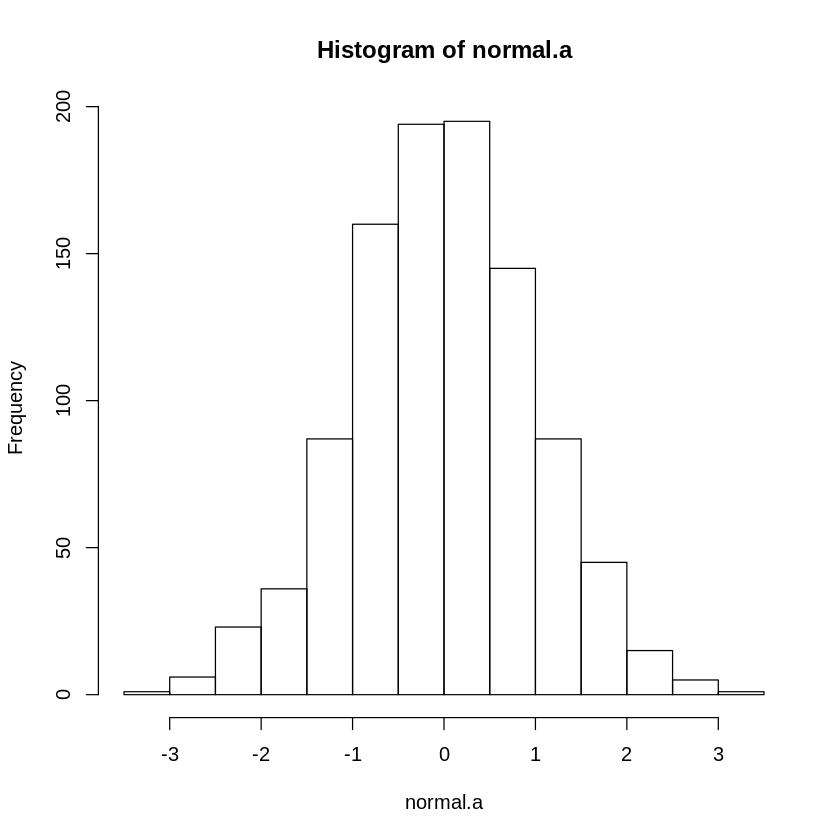

In [5]:
normal.a <- rnorm(n=1000, mean=0, sd=1)
hist(normal.a)

sum of squares of n-normally distributed random variables equates to a Chi-squared distribution with n degrees of freedom

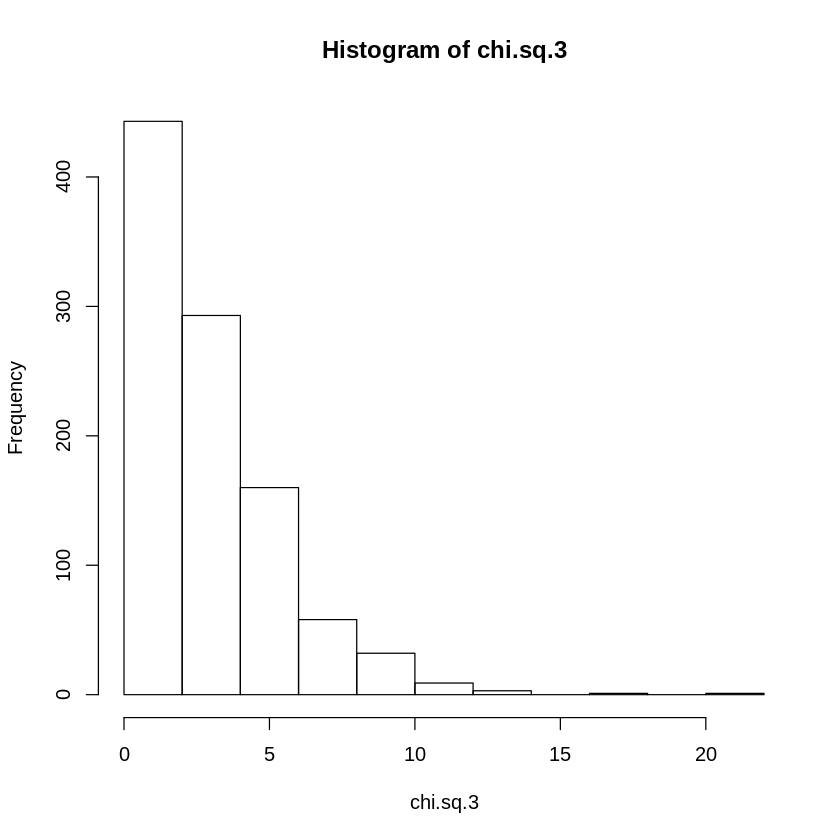

In [6]:
normal.b <- rnorm(n=1000)
normal.c <- rnorm(n=1000)

chi.sq.3 <- (normal.a)^2 + (normal.b)^2 + (normal.c)^2
hist(chi.sq.3)

scale chi-squared distribution

In [7]:
scaled.chi.sq.3 <- chi.sq.3 / 3

take a set of normally distributed varialbes and divide them by sqrt of chi-squared variable. Result is t-distribution with 3 dof

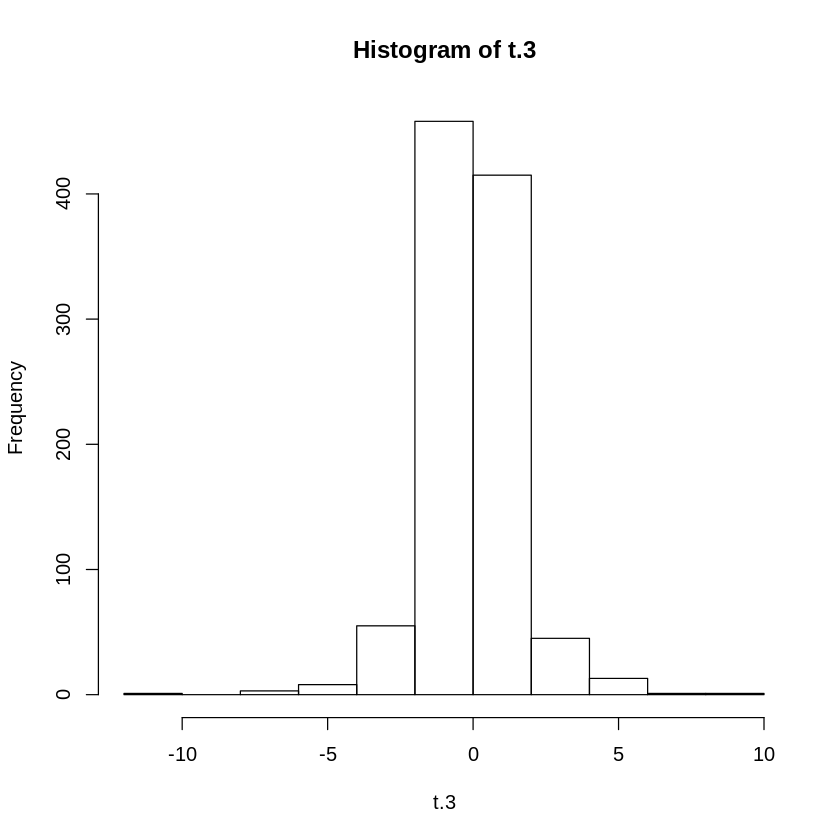

In [8]:
normal.d <- rnorm(n=1000)
t.3 <- normal.d / sqrt(scaled.chi.sq.3)
hist(t.3)

Get an F-distirbution by taking the ratio between two scaled chi-squared distributions. 

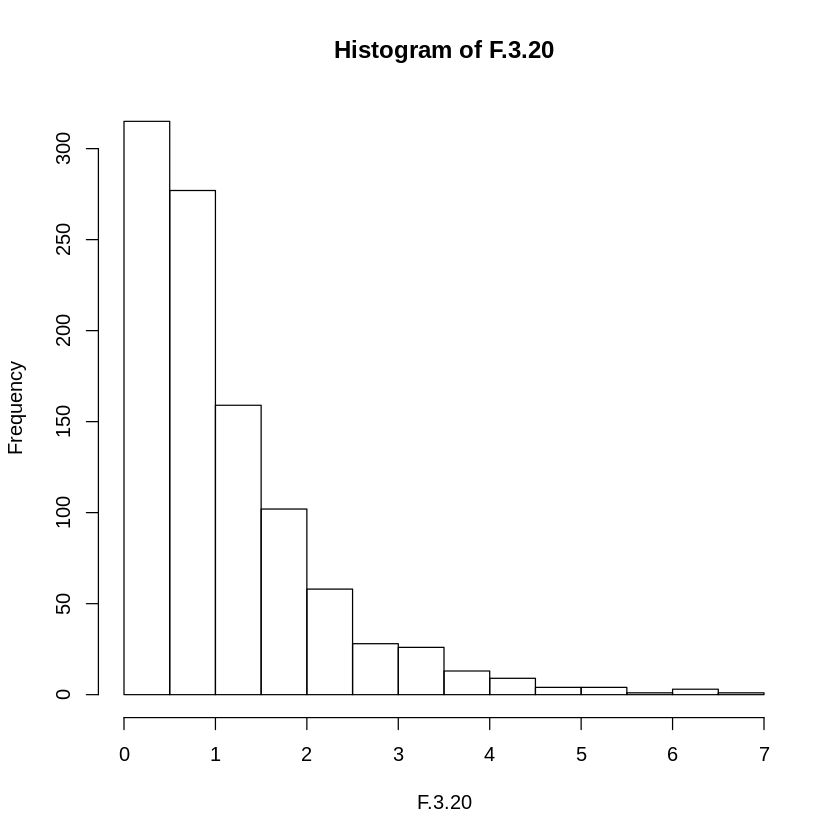

In [9]:
chi.sq.20 <- rchisq(1000, 20)
scaled.chi.sq.20 <- chi.sq.20 / 20
F.3.20 <- scaled.chi.sq.3 / scaled.chi.sq.20
hist(F.3.20)